# Plot Lat Lon Pool

Test plotting distance to pool
Migrate this into main parser

In [1]:
import os
import sys
import numpy
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
#from sklearn.cluster import KMeans
plt.style.use('seaborn-white') #fivethirtyeight, ggplot
from adjustText import adjust_text
from glob import glob
from tqdm import tqdm_notebook as tqdm
import geopy.distance

In [2]:
def get_signed_distance(p1,p2):
    d = geopy.distance.vincenty(p1,p2).m
    if (p2[0] < p1[0] or p2[1] > p1[1]):
        return -1 *d
    else:
        return d

In [3]:
files = glob('../data/json/*.json')
print('Found {} files'.format(len(files)))

Found 12 files


In [4]:
def create_ap_map(fpath,svg=False,png=False,display=True,limit=10):
    print('[+] Process: {}'.format(fpath))
    bname = os.path.basename(fpath)
    fname = os.path.splitext(bname)[0]
    with open(fpath,'r') as fp:
        data = json.load(fp)
    
    # find the closest max-40 networks to the target location
    networks = data['networks']
    meta = data['meta']

    lat_origin = meta['lat_origin']
    lon_origin = meta['lon_origin']
    p_origin = (lat_origin,lon_origin)
    
    # option 1
    clr_red = '#FFF051' # dots
    clr_yellow = '#CB4A33' # lines
    
    # option 2
    clr_blau_schwarz = '#0094FF' # dot
    clr_blau_hell = '#E3F2FF' # lines

    for net in networks:
        p_query = (net['lat'],net['lon'])
        p_query_x = (net['lat'],lon_origin)
        p_query_y = (lat_origin,net['lon'])
        d = geopy.distance.vincenty(p_origin,p_query).m
        dx = get_signed_distance(p_origin,p_query_x)
        dy = get_signed_distance(p_origin,p_query_y)
        net['distance_x_m'] = dx
        net['distance_y_m'] = dy
        net['distance_xy_m'] = d

    networks_sorted = sorted(networks, key=lambda x: x['distance_xy_m'], reverse=False)
    networks_sorted = networks_sorted[:min(limit,len(networks_sorted))]
    print('[+] Using: {}/{} networks'.format(len(networks_sorted),len(networks)))
    
    ## plot it?
    x = [n['distance_x_m'] for n in networks_sorted]
    y = [n['distance_y_m'] for n in networks_sorted]
    labels = [n['ssid'] for n in networks_sorted]

    fig, ax = plt.subplots(figsize=(16,16))
    ax.scatter(x, y, s=13, marker='o',color=clr_blau_schwarz) 

    texts = []
    for i, label in enumerate( labels ):
        txt = '{}\n{}'.format(label,networks_sorted[i]['bssid'])
        texts.append(ax.text(x[i], y[i], txt,size=10,ha='center', va='center'))
    adjust_text(texts,arrowprops=dict(arrowstyle="-", color=clr_blau_hell, lw=1))
  
    ax.scatter(x, y, s=8, marker='o',color=clr_blau_schwarz) 
    
    # set the x-spine (see below for more info on set_position)
    ax.spines['left'].set_position('zero')
    ax.spines['left'].set_color('#CCCCCC')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_color('#CCCCCC')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')

    plt.xticks([]),plt.yticks([])
    ax.patch.set_visible(False)
    
    if display:
        plt.show()
    if svg:
        fp_out = '../data/svg/{}.svg'.format(fname)
        fig.savefig(fp_out, dpi=300)
    if png:
        fp_out = '../data/svg/{}.png'.format(fname)
        fig.savefig(fp_out, dpi=300)

[+] Process: ../data/json/milner.json
[+] Using: 30/100 networks
[+] Process: ../data/json/bezos.json
[+] Using: 30/100 networks
[+] Process: ../data/json/thiel_la.json
[+] Using: 30/100 networks
[+] Process: ../data/json/allen.json
[+] Using: 30/100 networks
[+] Process: ../data/json/zuckerberg.json
[+] Using: 30/100 networks
[+] Process: ../data/json/spiegel.json
[+] Using: 30/100 networks
[+] Process: ../data/json/parker.json
[+] Using: 30/100 networks
[+] Process: ../data/json/andreesen.json
[+] Using: 30/100 networks
[+] Process: ../data/json/thiel_hi.json
[+] Using: 16/16 networks
[+] Process: ../data/json/page.json
[+] Using: 30/100 networks
[+] Process: ../data/json/schmidt.json
[+] Using: 30/100 networks
[+] Process: ../data/json/pichai.json
[+] Using: 30/100 networks



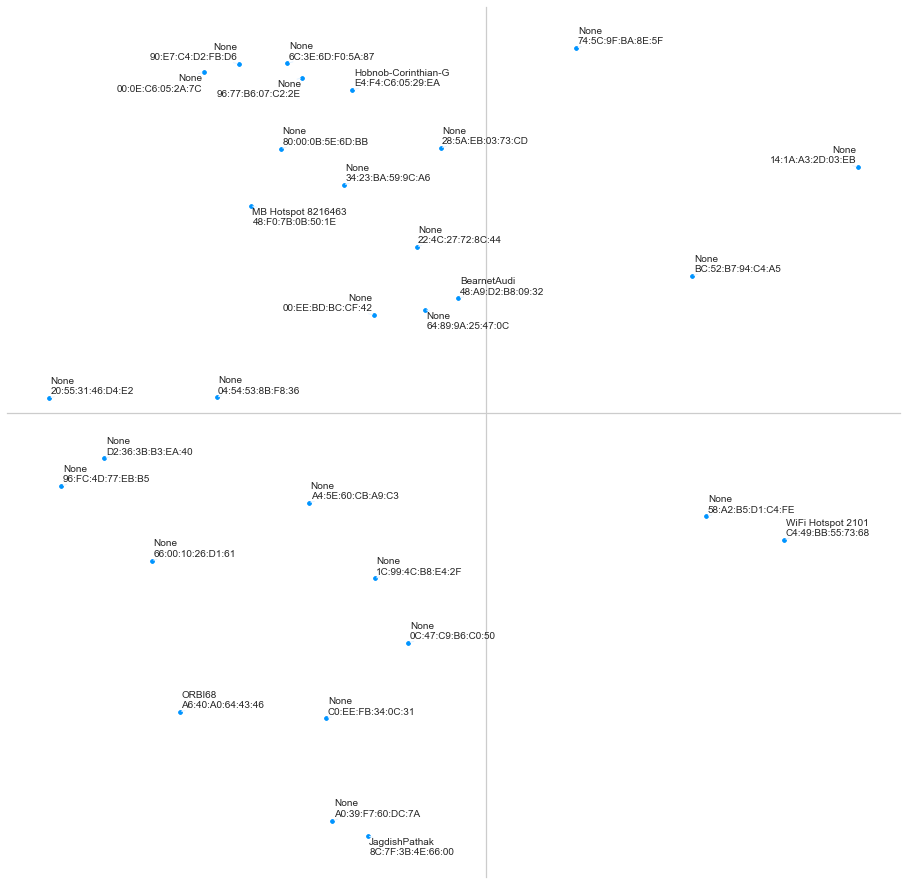

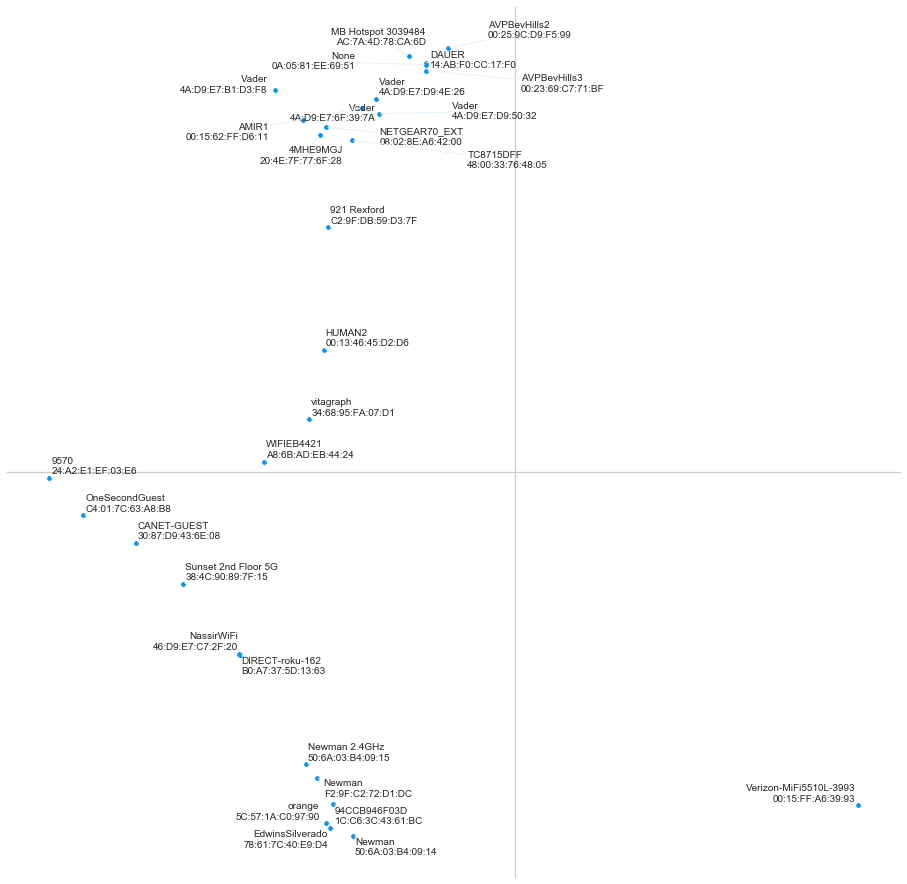

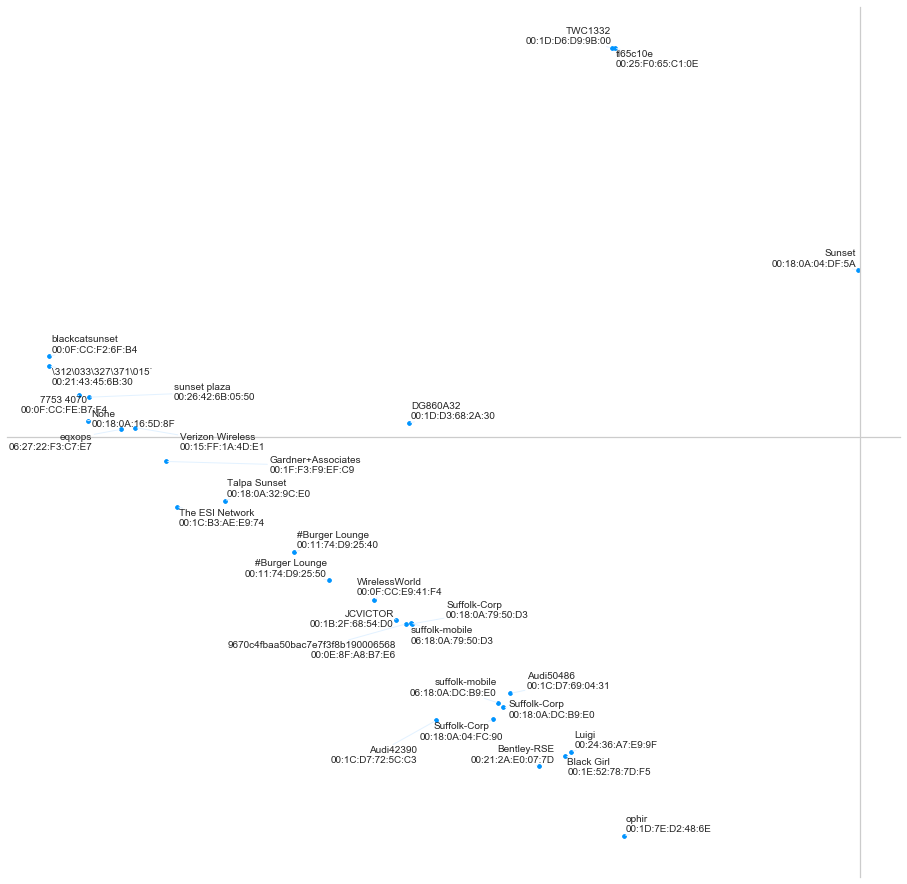

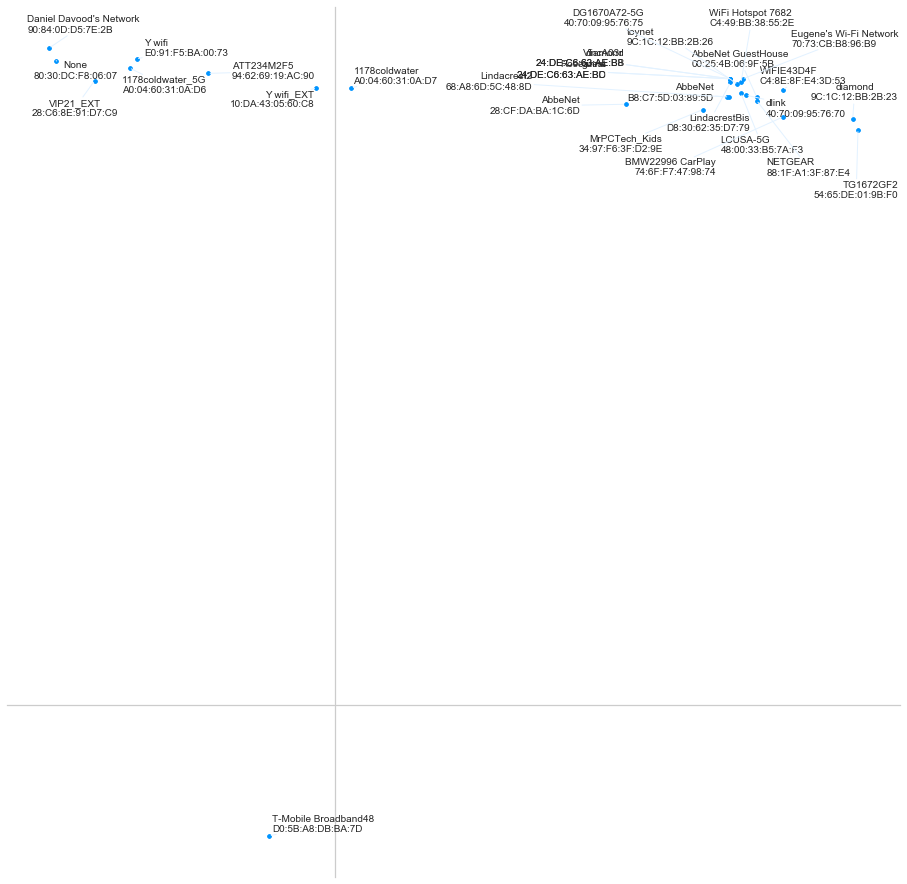

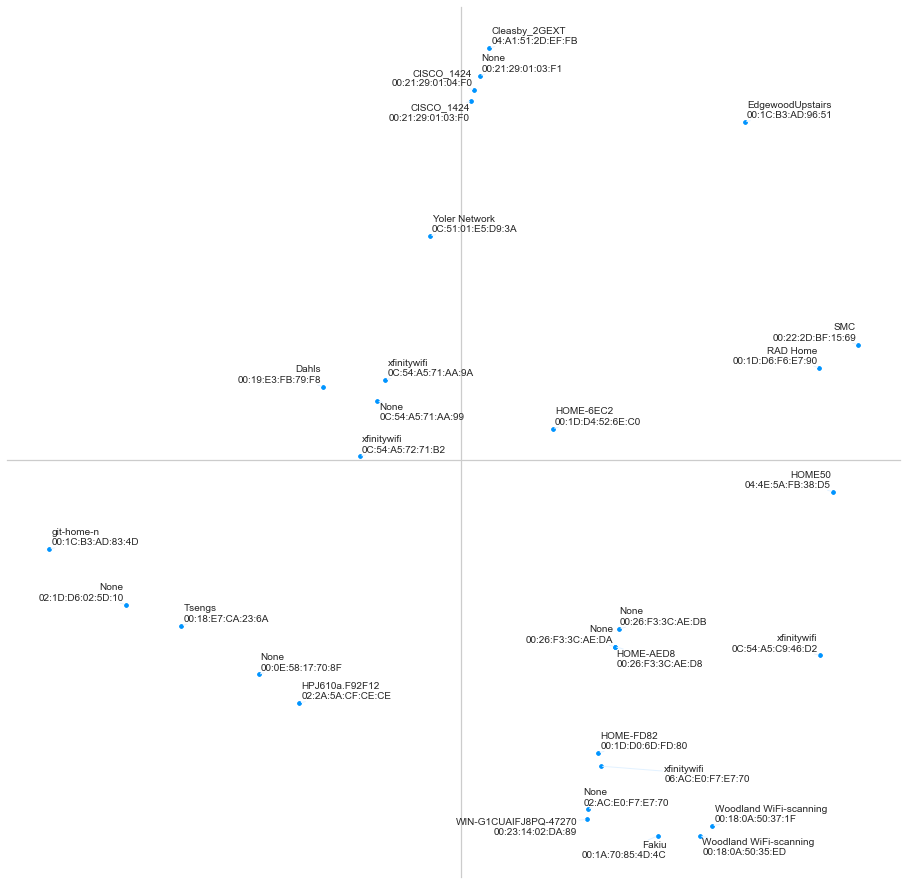

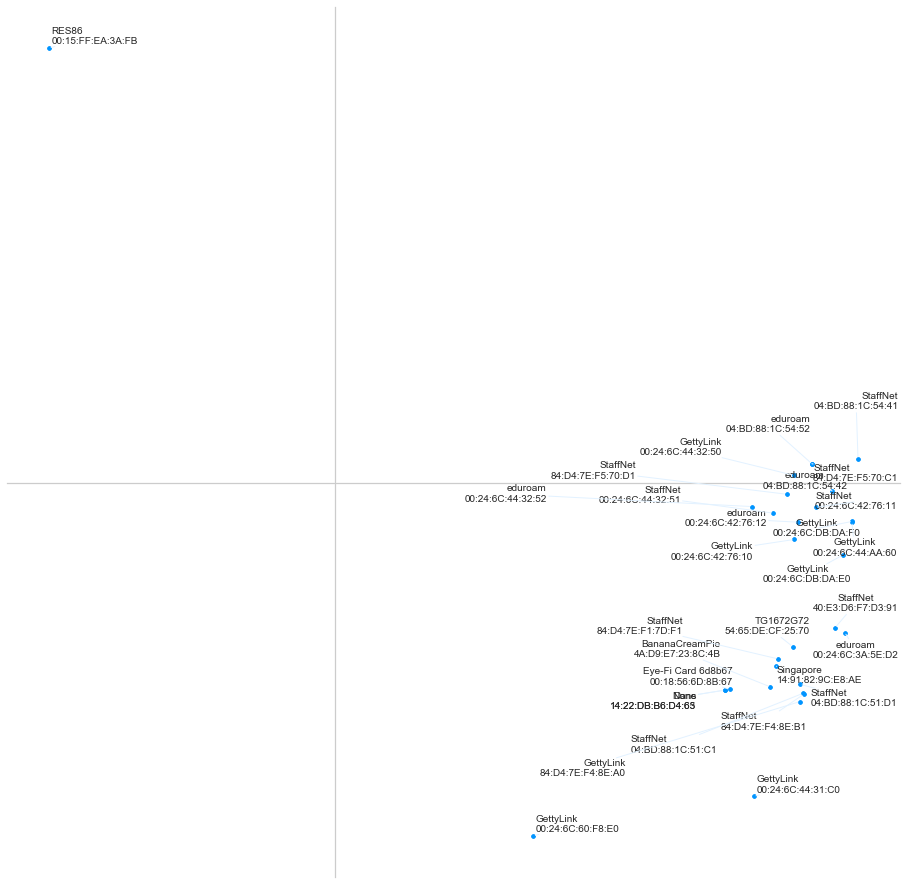

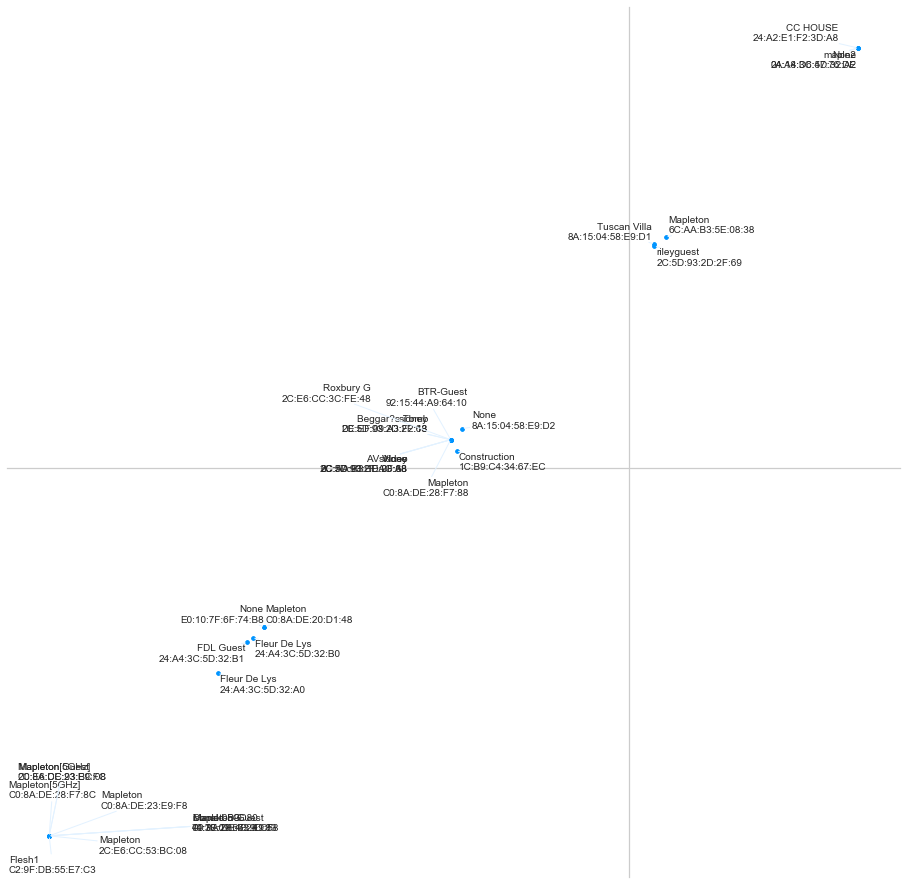

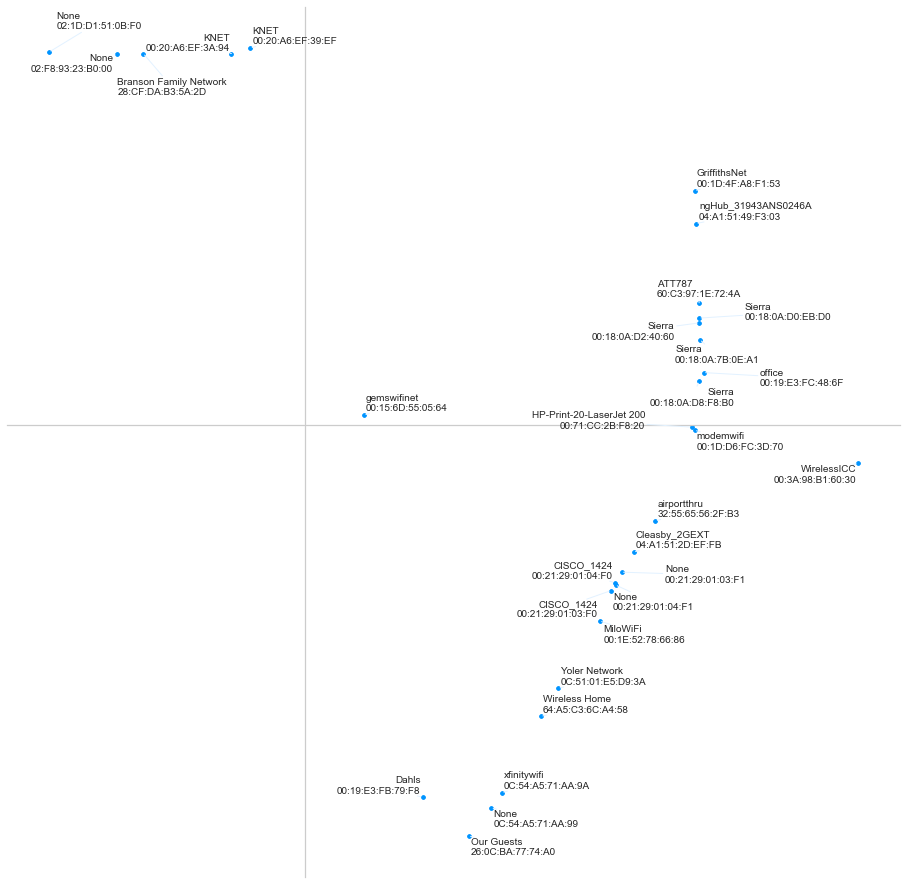

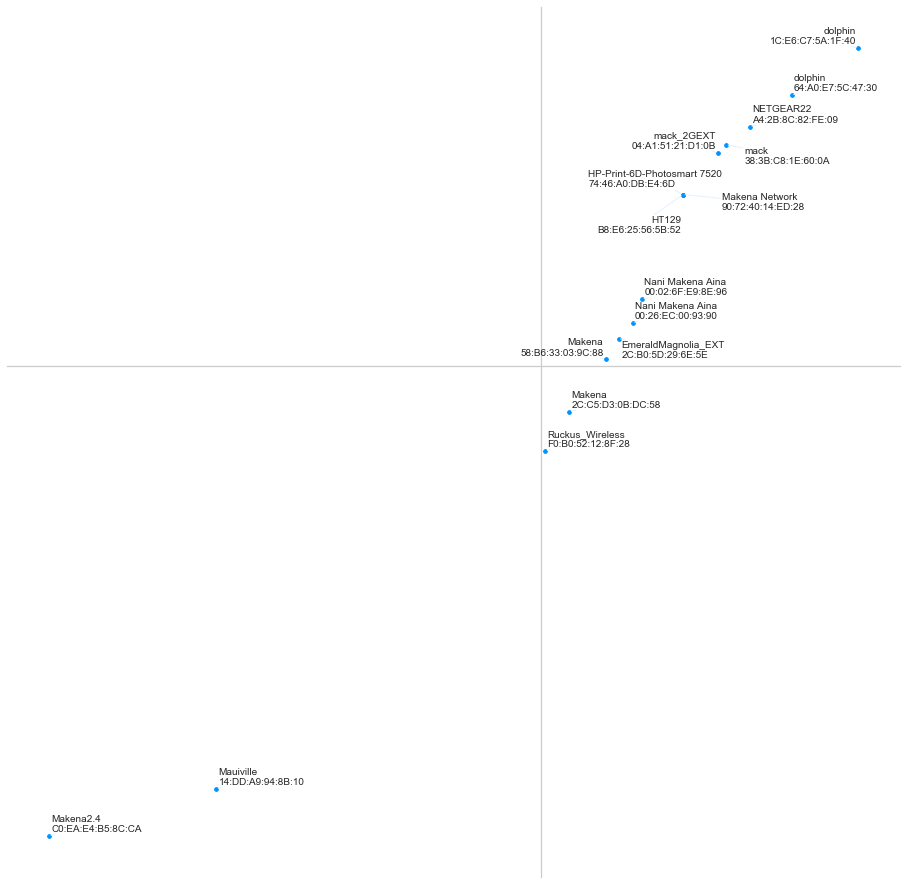

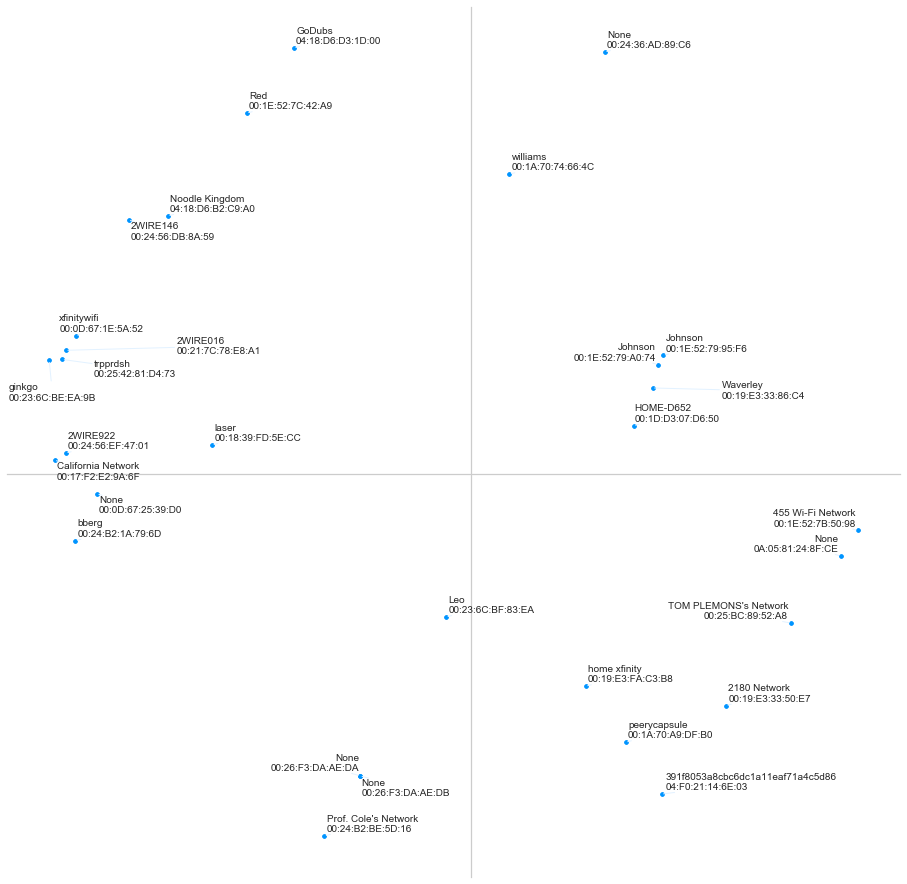

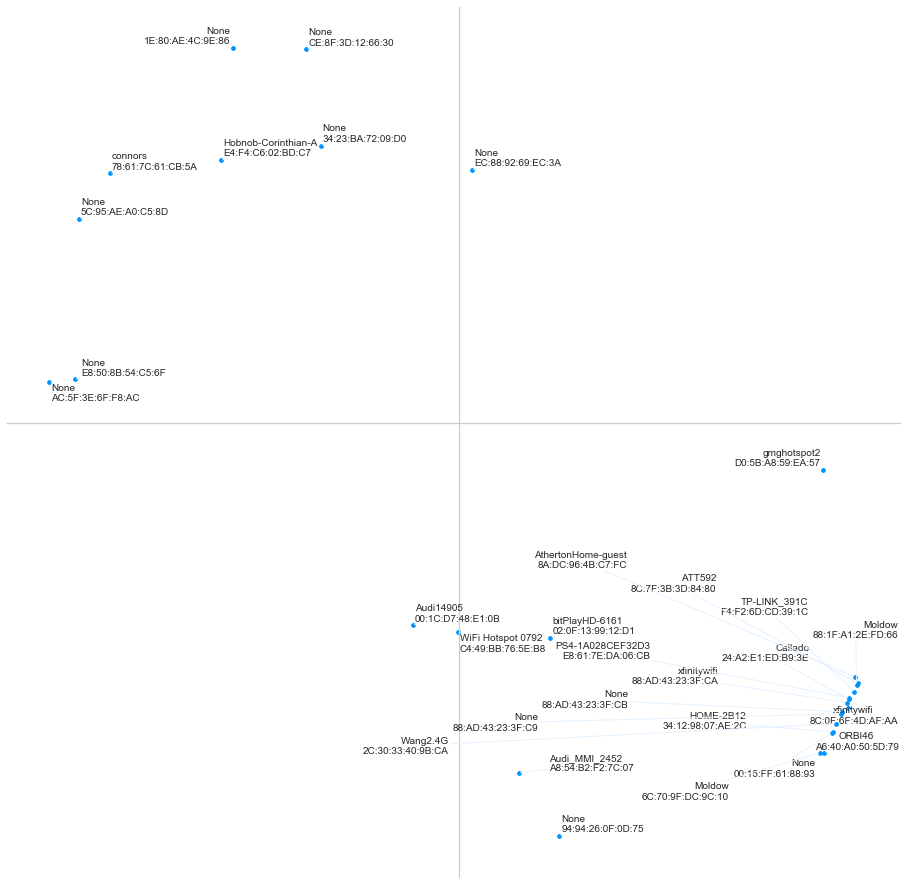

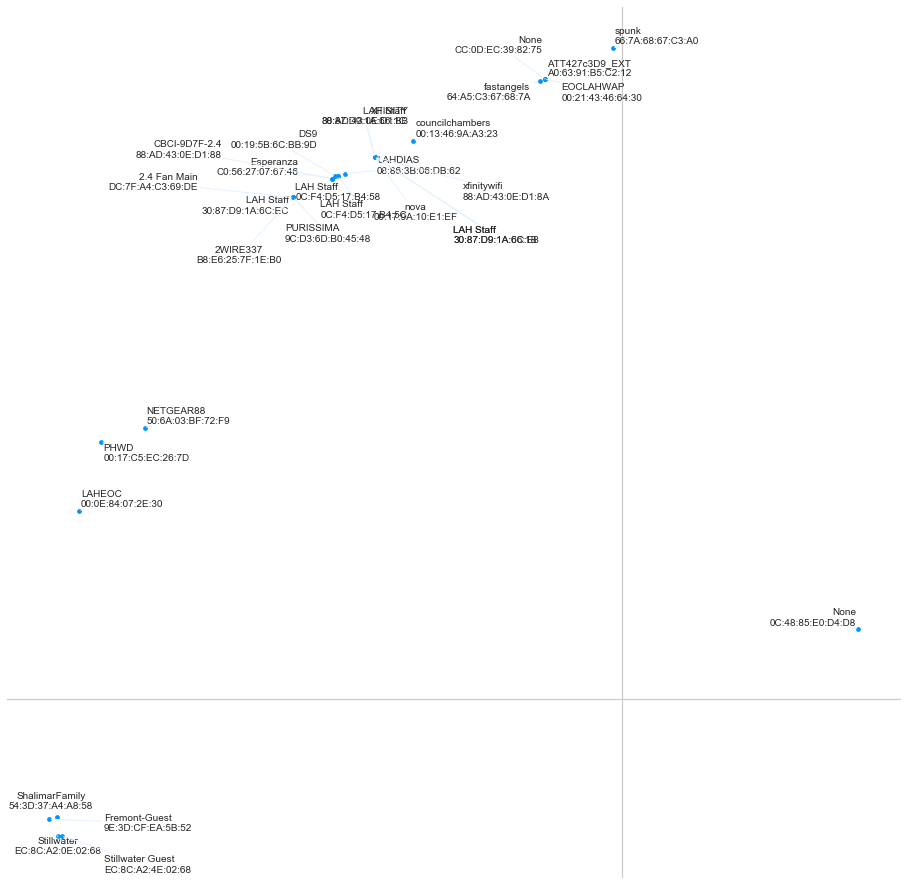

In [5]:
for f in tqdm(files):
    create_ap_map(f,svg=True,png=True,display=False,limit=30)